In [1]:
import os 
import pandas as pd
os.chdir(r'F:\Racial_Block_Voting\dev_pip') 
from Racial_Block_Voting_tools import *
from vote_index import *

#### Data For Ecological_Regression

In [2]:
df_Votes = pd.read_csv(r'F:\Racial_Block_Voting\BAF-al_2020.csv',dtype={'GEOID20_left':str,'COUNTYFP20':str})
df_CD = pd.read_csv(r'F:\Racial_Block_Voting\AL_94_CD116_7.csv', dtype={'GEOID':str,'VTD':str,'CD116':str,'COUNTY':str})
TarPop = 'P0030004'
TotPop = 'P0030001'
df_Votes = df_Votes[['VTDST20','COUNTYFP20','G20PRERTRU','G20PREDBID']]
df_Votes = df_Votes.drop_duplicates().reset_index(drop=True)
df_Votes = df_Votes.rename(columns={'VTDST20':'VTD','COUNTYFP20':'COUNTY'})
df_CD = df_CD[['VTD','COUNTY',TarPop,TotPop]]
df_CD = df_CD.groupby(['VTD','COUNTY']).sum()
df = df_CD.merge(df_Votes, how='inner',on=['VTD','COUNTY'])
df = df.drop_duplicates()
df = df.drop(columns=['COUNTY'])
df_sum = df.groupby(['VTD']).sum().reset_index()
df = df[['VTD']].merge(df_sum, on='VTD')
df = df.drop_duplicates()
assert len(df.index) != 0
assert len(df_Votes.index) != 0
df['Target_Percentage'] = df[TarPop]/df[TotPop]
df['Vote_Percentage'] = df['G20PREDBID']/(df['G20PRERTRU'] + df['G20PREDBID'])
# Census Privacy DAS creates Block and VTD with 0 population and a vote total
df = df[df[TarPop] != 0 ]


In [3]:
df.head()

,VTD,P0030004,P0030001,G20PRERTRU,G20PREDBID,Target_Percentage,Vote_Percentage
0,000001,1530,2142,651,1616,0.714286,0.712836
3,000002,1703,2365,345,834,0.720085,0.707379
6,000003,2860,4121,962,1297,0.694006,0.574148
11,000004,4224,6449,949,2159,0.654985,0.694659
15,000005,422,615,161,471,0.686179,0.745253


#### rpv_tools
##### Ecological_Regression(df, TotalPopCol, TargetPopCol, Party1, Party2)

eval_env: 1


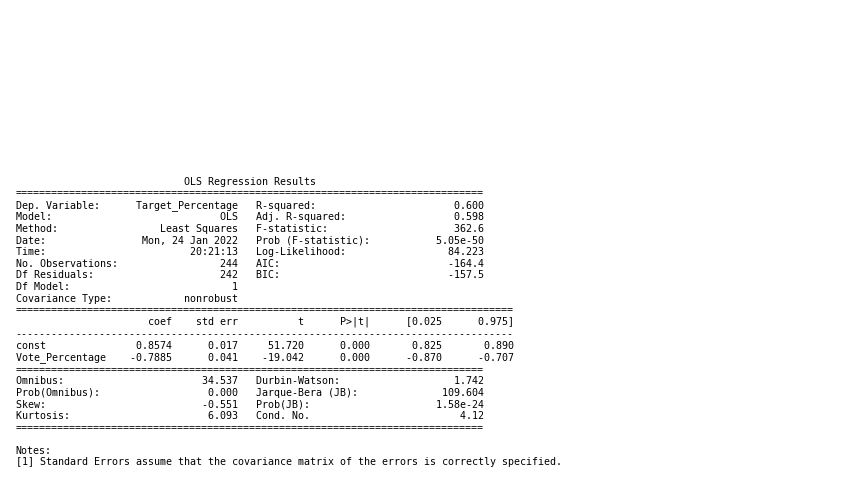

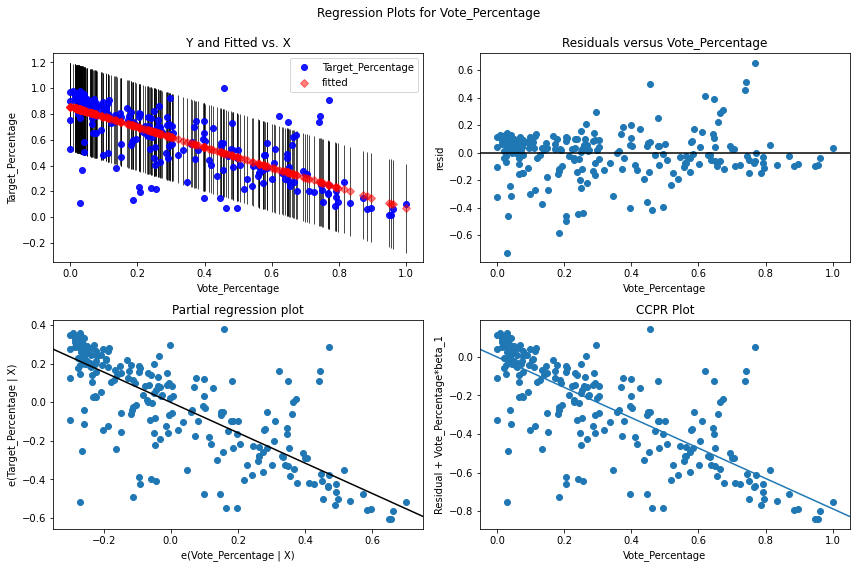

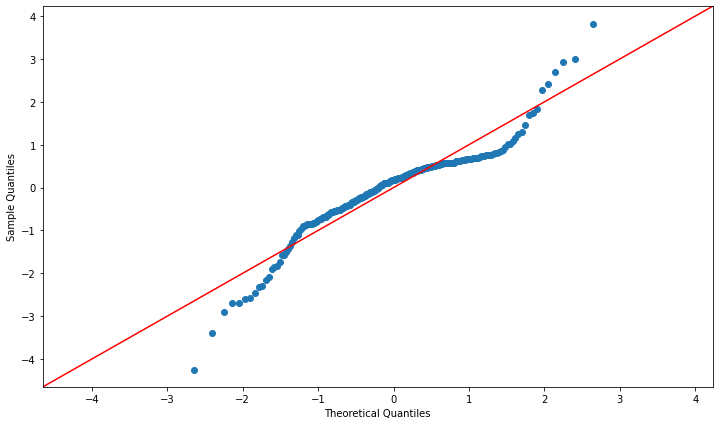

In [4]:
Ecological_Regression(df=df, TotalPopCol=TotPop, TargetPopCol=TarPop, Party1='G20PRERTRU', Party2='G20PREDBID')

#### Data For Homogeneous_Precinct

In [5]:
df_Votes = pd.read_csv(r'F:\Racial_Block_Voting\BAF-al_2020.csv',dtype={'GEOID20_left':str,'COUNTYFP20':str})
df_CD = pd.read_csv(r'F:\Racial_Block_Voting\AL_94_CD116_7.csv', dtype={'GEOID':str,'VTD':str,'CD116':str,'COUNTY':str})
WhiPop = 'P0030003'
TarPop = 'P0030004'
TotPop = 'P0030001'
df_Votes = df_Votes[['VTDST20','COUNTYFP20','G20PRERTRU','G20PREDBID']]
df_Votes = df_Votes.drop_duplicates().reset_index(drop=True)
df_Votes = df_Votes.rename(columns={'VTDST20':'VTD','COUNTYFP20':'COUNTY'})
df_CD = df_CD[['VTD','COUNTY',WhiPop,TarPop,TotPop]]
df_CD = df_CD.groupby(['VTD','COUNTY']).sum()
df = df_CD.merge(df_Votes, how='inner',on=['VTD','COUNTY'])
df = df.drop_duplicates()
df = df.drop(columns=['COUNTY'])
df_sum = df.groupby(['VTD']).sum().reset_index()
df = df[['VTD']].merge(df_sum, on='VTD')
df = df.drop_duplicates()
assert len(df.index) != 0
assert len(df_Votes.index) != 0
df.head()

,VTD,P0030003,P0030004,P0030001,G20PRERTRU,G20PREDBID
0,000001,573,1530,2142,651,1616
3,000002,608,1703,2365,345,834
6,000003,1165,2860,4121,962,1297
11,000004,2047,4224,6449,949,2159
15,000005,175,422,615,161,471


##### Method Homogeneous_Precinct(df, idx, MajorityPopCol, MinorityPopCol, TotalPopCol, Party1, Party2)

In [6]:
Homogeneous_Precinct(df=df, idx='VTD', MajorityPopCol=WhiPop, MinorityPopCol=TarPop, TotalPopCol=TotPop, Party1='G20PRERTRU', Party2='G20PREDBID')

c:\Miniconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
